## 1

A decision tree is a type of machine learning tool that is structured like a tree-like flowchart that consists of nodes, branches, and leaf nodes. Nodes represent a decision point in the model and are based on a threshold for an attribute, and branches represent possible outcomes of the decision for a node (i.e. if the threshold was reached or not). Leaf nodes represent the predicted class/category. Decision trees are used to solve classification problems (e.g. if a transaction is fradulent or not, if a patient is at risk for a disease or not). Multiple linear regression models take in inputs to predict a continuous output instead of a discrete category, while decision trees predict the class/category based on their inputs.

https://chatgpt.com/share/673c1747-acdc-8013-b1f6-511ccb784a79

## 2

Accuracy should be used when both outcomes (true or false) are equally important. For example, accuracy should be used in weather predictions (e.g. if it rains tomorrow or not), as a bad prediction will cost people that listened to the prediction (e.g. bringing an umbrella when they didnt need to / getting soaked by rain).

Sensitivity should be used when false negatives are more costly than false positives. For example, sensitivity should be used in disease identification, where a false positive might be an annoyance for the patient but a false negative could be life threatening.

Specificity should be used when false positives are more costly than missing positives false negatives. For example, specificity could be used as a metric in email spam filters, where spam that is not filtered (false negative) is slightly annoying to the user of the email client, but if an important email is wrongly filtered out, there could be great consequences.

Precision should be used when positive predictions need to be as reliable as possible (so it is very important *not* to have false positives). For example, precision should be used as a metric on instagram reels, where if the wrong reel is shown the user might lose interest and close the app.

https://chatgpt.com/share/673c1747-acdc-8013-b1f6-511ccb784a79

## 3

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

In [2]:
# Remove the specified columns
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab = ab.dropna()

# Set 'Pub year' and 'NumPages' to integer type
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)

# Set 'Hard_or_Paper' to category type
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Display the first few rows to verify changes
print(ab.info())
print(ab.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

https://chatgpt.com/share/673c2144-b02c-8013-ad65-9a5d3d690d3d

## 4

In [3]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab, test_size=0.2, random_state=42)

# Verify the split sizes
print(f"Train set size: {len(ab_reduced_noNaN_train)} rows")
print(f"Test set size: {len(ab_reduced_noNaN_test)} rows")

Train set size: 255 rows
Test set size: 64 rows


The line `y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']` generates a column using the `Hard_or_Paper` categorical variable. The column is 1 (true) if the value is `H` and 0 (false) otherwise (ie it is paperback, not hard).

The line `X = ab_reduced_noNaN[['List Price']]` creates a dataframe containing only the `List Price` column, which can then be used to predict if a book is hard or paperback.

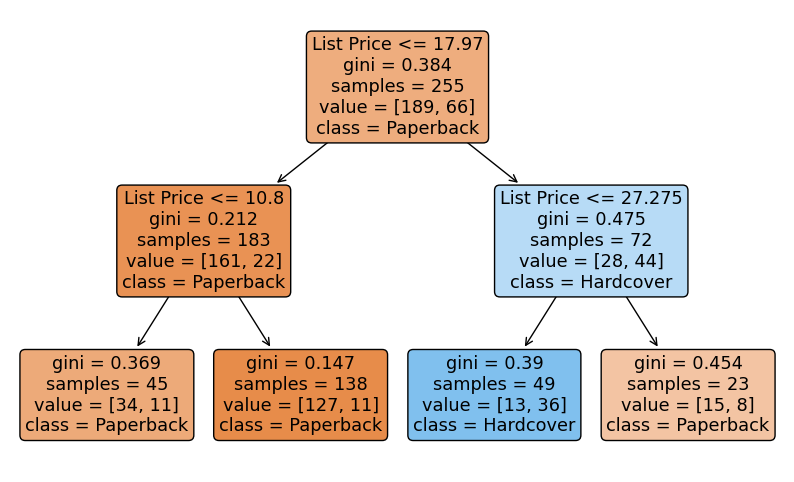

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the classifier with max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model using the training data
clf.fit(ab_reduced_noNaN_train[['List Price']], pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H'])

# Visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.show()


https://chatgpt.com/share/673c2144-b02c-8013-ad65-9a5d3d690d3d

## 5

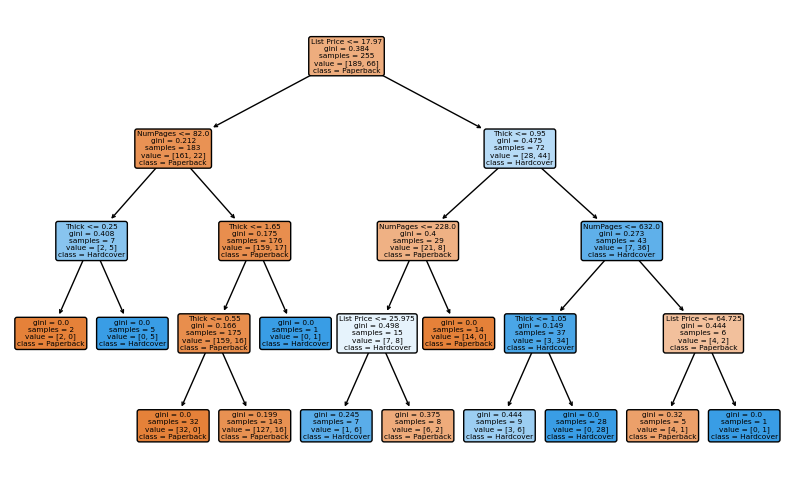

In [5]:
# Define the classifier with max_depth of 2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model using the training data
clf2.fit(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']], pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H'])

# Visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.show()

The new classification decision tree uses three predictors `'NumPages', 'Thick', 'List Price'` instead of one, so the observations at each node can be split into two groups using any of the three predictor variables instead of just `'List Price'`. Furthermore, `max_depth` is increased to 4, so more distinct groups can be created to better separate the obsevations into Paperback or Hardcover categories.

## 6

Model 1 Metrics:
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Model 2 Metrics:
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86


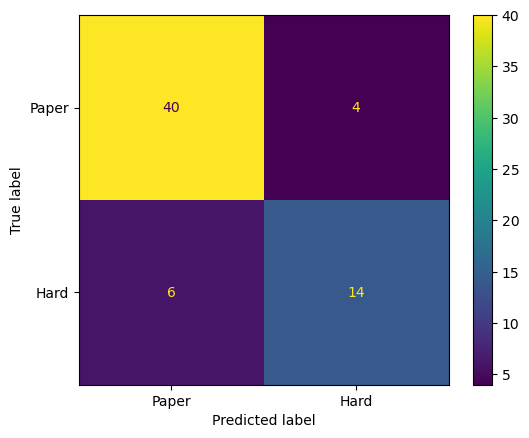

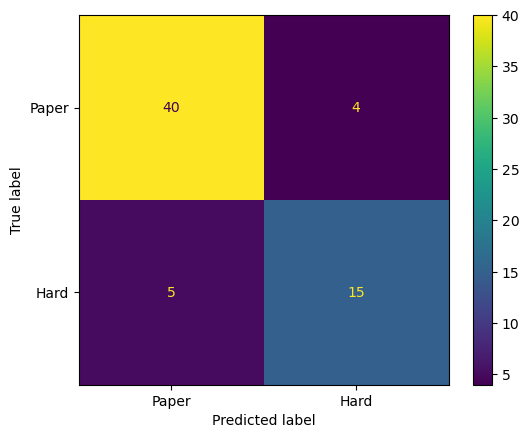

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']  # Binary labels: 1 for 'H', 0 for others
y_pred = clf.predict(ab_reduced_noNaN_test[['List Price']])
y_pred2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# Confusion matrices
cm1 = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm2 = confusion_matrix(y_test, y_pred2, labels=[0, 1])

# Display confusion matrices
ConfusionMatrixDisplay(
    confusion_matrix=cm1, 
    display_labels=["Paper", "Hard"]
).plot()
ConfusionMatrixDisplay(
    confusion_matrix=cm2, 
    display_labels=["Paper", "Hard"]
).plot()

# Function to calculate metrics
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()  # Extract confusion matrix components
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    return sensitivity, specificity, accuracy

# Calculate metrics for both models
sensitivity1, specificity1, accuracy1 = calculate_metrics(cm1)
sensitivity2, specificity2, accuracy2 = calculate_metrics(cm2)

# Print results
print("Model 1 Metrics:")
print(f"Sensitivity: {sensitivity1:.2f}")
print(f"Specificity: {specificity1:.2f}")
print(f"Accuracy: {accuracy1:.2f}")

print("\nModel 2 Metrics:")
print(f"Sensitivity: {sensitivity2:.2f}")
print(f"Specificity: {specificity2:.2f}")
print(f"Accuracy: {accuracy2:.2f}")


https://chatgpt.com/share/673d0999-4938-8013-bad3-c12c907d877d

## 7

The confusion matricies below are based on `ab_reduced_noNaN_train` instead of `ab_reduced_noNaN_test`. This means that they reflect how well the model performs on the dataset it was trained on, instead of its real world performance on an new unseen dataset. Therefore, a model that is heavily overfit on the training dataset will appear to perform very well using the confusion matricies below, but will perform poorly on an unseen dataset, which would be revealed using the confusion matricies in question 6.

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()